In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import FortranFile
from pathlib import Path

plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': 'cmr10',
    'mathtext.fontset': 'cm',
    'axes.unicode_minus': False,
    'font.size': 11,
    'figure.dpi': 150,
    'lines.linewidth': 0.5,
    'axes.grid': True
})

In [91]:
filepath = Path('./test.fbin')
Ffile = FortranFile(filepath)
rawdata = Ffile.read_reals()

resfilepath = Path('./residual.fbin')
Fresfile = FortranFile(resfilepath)
residual = Fresfile.read_reals()

dt = 1e-5

In [92]:
# data = rawdata.reshape((18,int(rawdata.size/18)))
# Y    = data[0:6  ,:]
# U    = data[6:12 ,:]
# Udot = data[12:18,:]

data = rawdata.reshape((int(rawdata.size/18), 18))
Y    = data[:,0:6  ]
U    = data[:,6:12 ]
Udot = data[:,12:18]

ranger = (0,10000)
skip = 100

In [93]:
data.shape

(10000, 18)

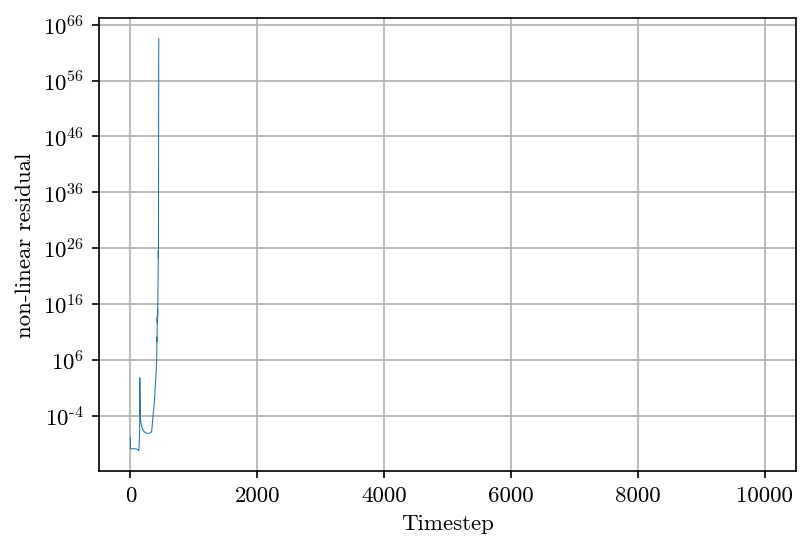

In [94]:
fig, ax = plt.subplots()

ax.plot(range(residual.size), residual)
ax.set_yscale('log')
ax.set_xlabel('Timestep')
_=ax.set_ylabel('non-linear residual')

In [95]:
# YTaylor = np.zeros_like(U)

# for n in range(data.shape[0]-1):
#     YTaylor[n+1] = YTaylor[n] + U[n]*dt

Text(0, 0.5, '-Z (height)')

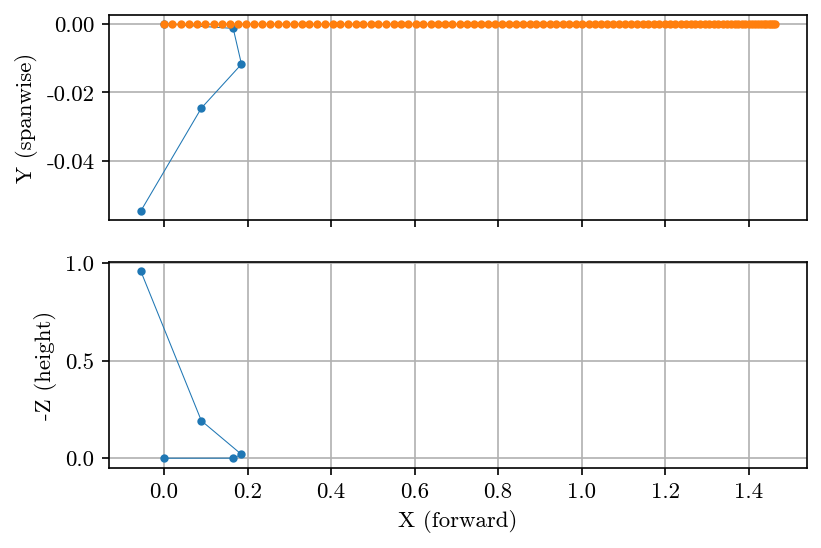

In [96]:
fig, ax = plt.subplots(2,1, sharex=True)

X = Y[ranger[0]:ranger[1]:skip,0] 
ax[0].plot(X, Y[ranger[0]:ranger[1]:skip,1], marker='.')
ax[0].plot(YTaylor[ranger[0]:ranger[1]:skip,0], YTaylor[ranger[0]:ranger[1]:skip,1], marker='.')
ax[1].plot(X,-Y[ranger[0]:ranger[1]:skip,2], marker='.')

ax[0].set_ylabel('Y (spanwise)')
ax[1].set_xlabel('X (forward)')
ax[1].set_ylabel('-Z (height)')

Text(0, 0.5, '$U_z$')

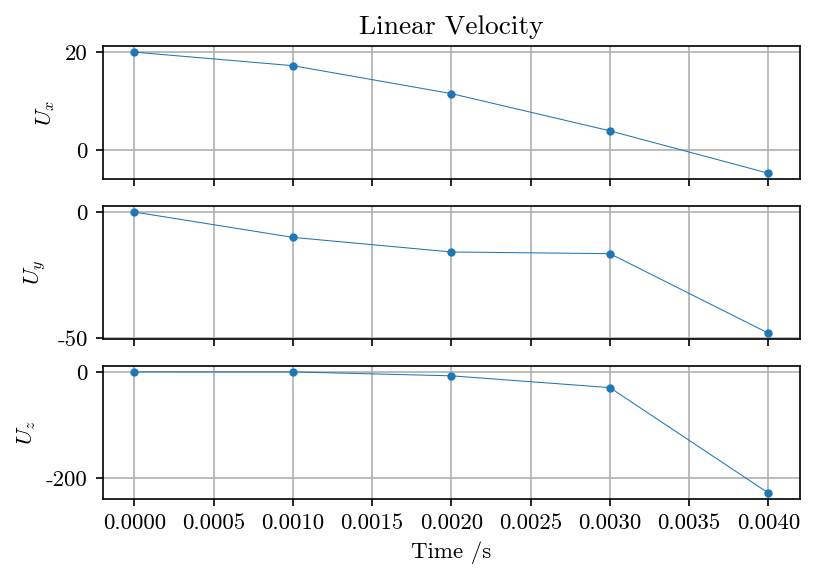

In [97]:
fig, ax = plt.subplots(3,1, sharex=True)
# ranger = (0,10000)
# skip = 100

X = dt*np.arange(ranger[0],ranger[1], skip) 
ax[0].plot(X, U[ranger[0]:ranger[1]:skip,0], marker='.')
ax[1].plot(X, U[ranger[0]:ranger[1]:skip,1], marker='.')
ax[2].plot(X, U[ranger[0]:ranger[1]:skip,2], marker='.')

ax[0].set_title('Linear Velocity')
ax[2].set_xlabel('Time /s')
ax[0].set_ylabel(r'$U_x$')
ax[1].set_ylabel(r'$U_y$')
ax[2].set_ylabel(r'$U_z$')

In [98]:
U[0] - U[1]

array([ 1.05895766e-03,  1.05692005e-01,  1.01448653e-04, -4.96363049e-08,
        3.32393596e-03,  7.25758802e-03])

Text(0, 0.5, '$\\dot U_z$')

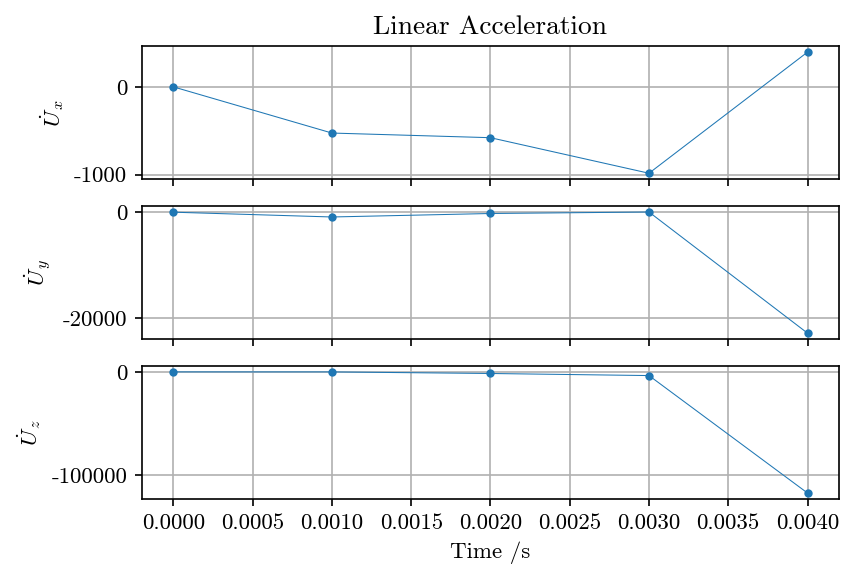

In [99]:
fig, ax = plt.subplots(3,1, sharex=True)
# ranger = (0,10000)
# skip = 100

X = dt*np.arange(ranger[0],ranger[1], skip)
ax[0].plot(X, Udot[ranger[0]:ranger[1]:skip,0], marker='.')
ax[1].plot(X, Udot[ranger[0]:ranger[1]:skip,1], marker='.')
ax[2].plot(X, Udot[ranger[0]:ranger[1]:skip,2], marker='.')

ax[0].set_title('Linear Acceleration')
ax[2].set_xlabel('Time /s')
ax[0].set_ylabel(r'$\dot U_x$')
ax[1].set_ylabel(r'$\dot U_y$')
ax[2].set_ylabel(r'$\dot U_z$')

In [100]:
print('Acceleration Mean:', Udot[100:,2].mean())
print('Acceleration STD: ', Udot[100:,2].std())

Acceleration Mean: nan
Acceleration STD:  nan


## Angular Plots

Text(0, 0.5, '$\\psi$ (yaw)')

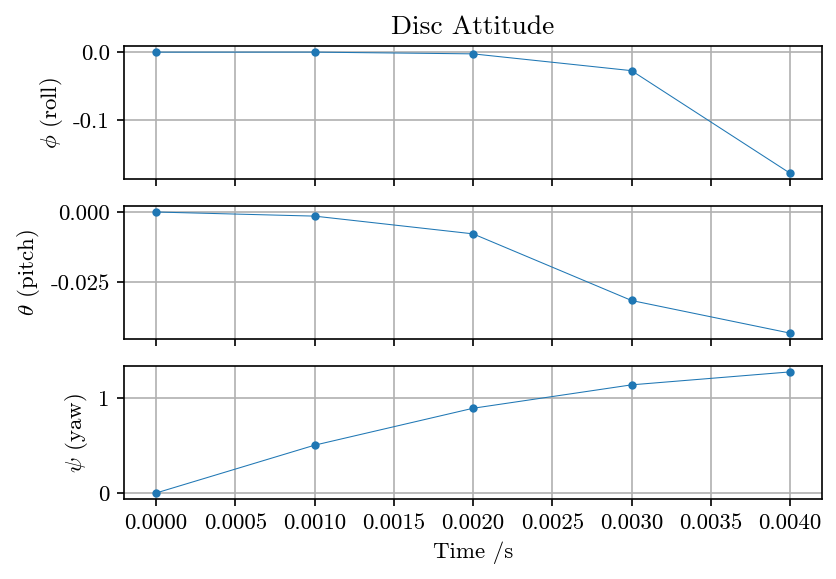

In [101]:
fig, ax = plt.subplots(3,1, sharex=True)
# ranger = (0,10000)
# skip = 100

X = dt*np.arange(ranger[0],ranger[1], skip) 
ax[0].plot(X, Y[ranger[0]:ranger[1]:skip,3], marker='.')
ax[1].plot(X, Y[ranger[0]:ranger[1]:skip,4], marker='.')
ax[2].plot(X, Y[ranger[0]:ranger[1]:skip,5], marker='.')

ax[0].set_title('Disc Attitude')
ax[2].set_xlabel('Time /s')
ax[0].set_ylabel(r'$\phi$ (roll)')
ax[1].set_ylabel(r'$\theta$ (pitch)')
ax[2].set_ylabel(r'$\psi$ (yaw)')

Text(0, 0.5, '$r$')

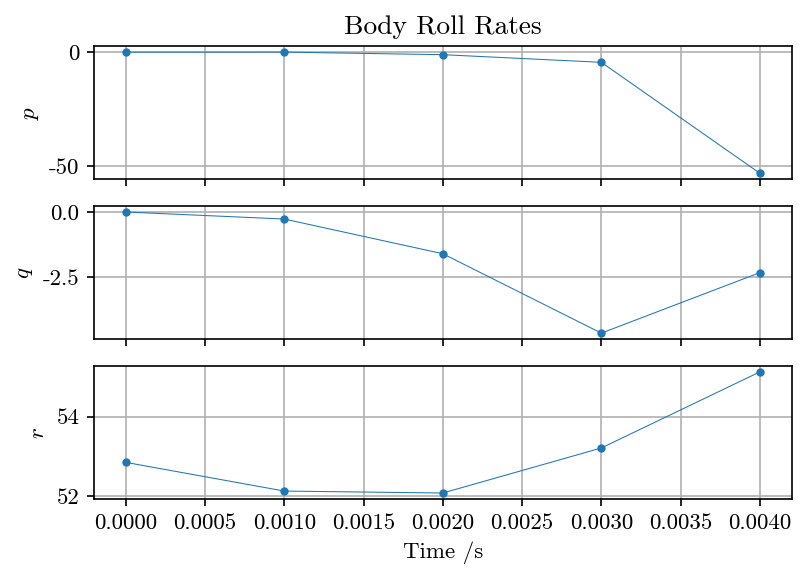

In [102]:
fig, ax = plt.subplots(3,1, sharex=True)
# ranger = (0,10000)
# skip = 100

X = dt*np.arange(ranger[0],ranger[1], skip) 
ax[0].plot(X, U[ranger[0]:ranger[1]:skip,3], marker='.')
ax[1].plot(X, U[ranger[0]:ranger[1]:skip,4], marker='.')
ax[2].plot(X, U[ranger[0]:ranger[1]:skip,5], marker='.')

ax[0].set_title('Body Roll Rates')
ax[2].set_xlabel('Time /s')
ax[0].set_ylabel(r'$p$')
ax[1].set_ylabel(r'$q$')
ax[2].set_ylabel(r'$r$')

Text(0, 0.5, '$\\dot r$')

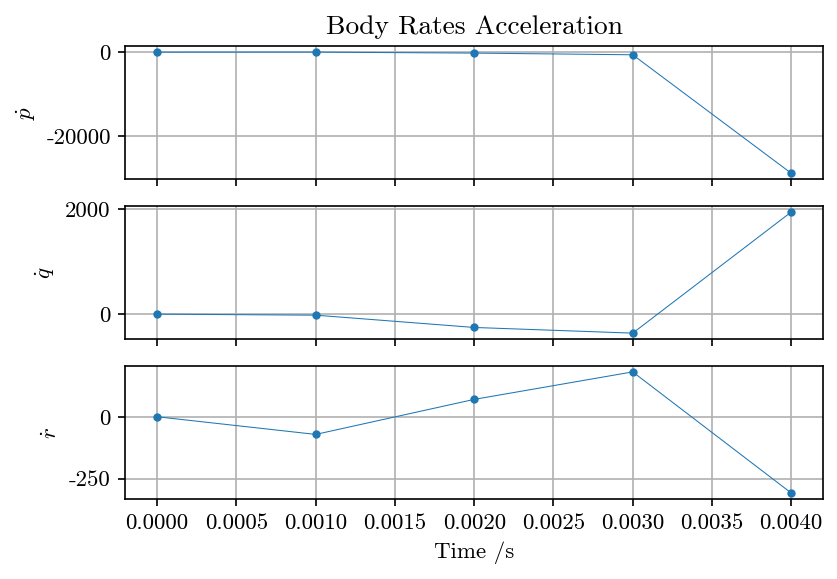

In [103]:
fig, ax = plt.subplots(3,1, sharex=True)
# ranger = (0,10000)
# skip = 100

X = dt*np.arange(ranger[0],ranger[1], skip) 
ax[0].plot(X, Udot[ranger[0]:ranger[1]:skip,3], marker='.')
ax[1].plot(X, Udot[ranger[0]:ranger[1]:skip,4], marker='.')
ax[2].plot(X, Udot[ranger[0]:ranger[1]:skip,5], marker='.')

ax[0].set_title('Body Rates Acceleration')
ax[2].set_xlabel('Time /s')
ax[0].set_ylabel(r'$\dot p$')
ax[1].set_ylabel(r'$\dot q$')
ax[2].set_ylabel(r'$\dot r$')